In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [5]:
# Our data
x_minutes = np.array([5, 12, 18, 22, 28, 35, 42, 48, 55, 63,72,85])
y_hit_10k_steps = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1,1,1])

In [7]:
# Fit logistic regression
log_model = LogisticRegression(solver='liblinear')
log_model.fit(x_minutes, y_hit_10k_steps)

# Predicted probabilities for plotting
x_range = np.linspace(0, 90, 300).reshape(-1, 1)
y_prob = log_model.predict_proba(x_range)[:, 1]  # Probability of class 1

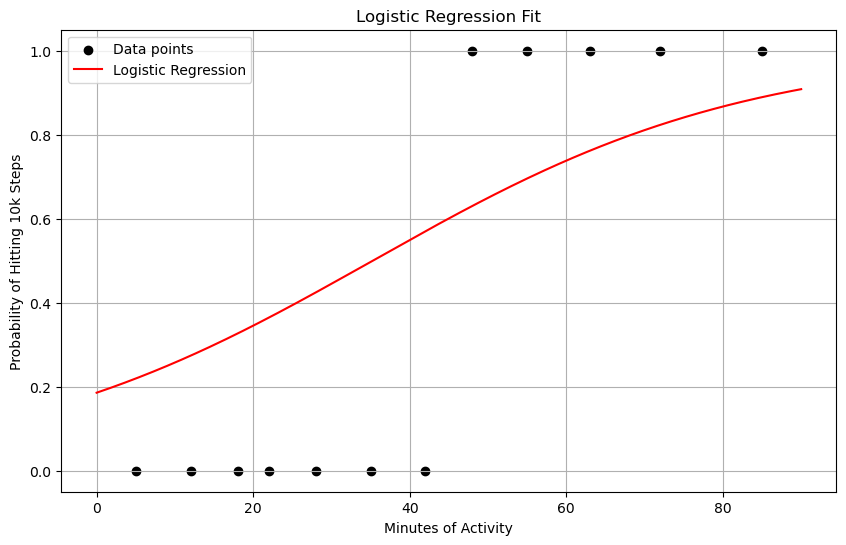

In [9]:
# Plot
plt.figure(figsize=(10,6))
plt.scatter(x_minutes, y_hit_10k_steps, color='black', label='Data points')
plt.plot(x_range, y_prob, color='red', label='Logistic Regression')
plt.xlabel('Minutes of Activity')
plt.ylabel('Probability of Hitting 10k Steps')
plt.title('Logistic Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Print model coefficients
print(f"Intercept: {log_model.intercept_[0]:.4f}")
print(f"Coefficient: {log_model.coef_[0][0]:.4f}")
# Print equation
print(f"Equation: y = {log_model.coef_[0][0]}x + {log_model.intercept_[0]}")

Intercept: -1.4779
Coefficient: 0.0419
Equation: y = 0.04192002010626461x + -1.4779204122407046


In [19]:
b0 = log_model.intercept_[0]
b1 = log_model.coef_[0][0]
# Desired probability
p = 0.70
# Solve for x
x_decision = (-np.log(1/p - 1) - b0) / b1
print(f"Minutes required for 70% probability: {x_decision:.2f}")

Minutes required for 70% probability: 55.47


In [23]:
x_new = np.array([16, 27, 33, 49, 67, 90]).reshape(-1, 1)
# Predicted probabilities for class 1
y_prob_new = log_model.predict_proba(x_new)[:, 1]
# Print results
for x_val, prob in zip(x_new.flatten(), y_prob_new):
    print(f"x = {x_val}: probability of hitting 10k steps = {prob:.4f}")

x = 16: probability of hitting 10k steps = 0.3085
x = 27: probability of hitting 10k steps = 0.4143
x = 33: probability of hitting 10k steps = 0.4764
x = 49: probability of hitting 10k steps = 0.6402
x = 67: probability of hitting 10k steps = 0.7910
x = 90: probability of hitting 10k steps = 0.9085
